#import dataset

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Link: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#import Librearies

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Testing dataset image processing

In [ ]:
train_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/vegetable dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


#Validtion Image Processing

In [ ]:

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/vegetable dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
cnn_models = tf.keras.models.Sequential()


In [ ]:
# Adding the first convolutional layer
cnn_models.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(64, 64, 3)))
cnn_models.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_models.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  # MaxPooling to reduce spatial dimensions

# Adding dropout to prevent overfitting
cnn_models.add(tf.keras.layers.Dropout(0.25))

# Adding the second convolutional layer
cnn_models.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn_models.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_models.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  # Another MaxPooling layer

# Adding another dropout layer
cnn_models.add(tf.keras.layers.Dropout(0.25))

# Flattening the 2D feature maps into a 1D feature vector
cnn_models.add(tf.keras.layers.Flatten())

# Fully connected (Dense) layers
cnn_models.add(tf.keras.layers.Dense(units=512, activation='relu'))  # Dense layer with 512 neurons
cnn_models.add(tf.keras.layers.Dense(units=256, activation='relu'))  # Dense layer with 256 neurons

# Adding another dropout layer for further regularization
cnn_models.add(tf.keras.layers.Dropout(0.5))  # Dropout rate is higher here to avoid overfitting

# Output layer
cnn_models.add(tf.keras.layers.Dense(units=36, activation='softmax'))  # Output layer with 36 classes


#Compiling and Training Phase

In [ ]:
cnn_models.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn_models.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,684 (25.36 MB)

 Trainable params: 6,647,684 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn_models.fit(x=train_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 537s 5s/step - accuracy: 0.0298 - loss: 9.5777 - val_accuracy: 0.0285 - val_loss: 3.5836
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.0362 - loss: 3.5822 - val_accuracy: 0.0285 - val_loss: 3.5838
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.0333 - loss: 3.5814 - val_accuracy: 0.0256 - val_loss: 3.5840
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.0303 - loss: 3.5802 - val_accuracy: 0.0313 - val_loss: 3.5837
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.0303 - loss: 3.5809 - val_accuracy: 0.0342 - val_loss: 3.5657
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.0352 - loss: 3.5741 - val_accuracy: 0.0826 - val_loss: 3.4937
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.0385 - loss: 3.5757 - val_accuracy: 0.0655 - val_loss: 3.5137
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.0449 - loss: 3.5533 - val_accuracy: 0.0684 - v

# Save Model

In [ ]:
cnn_models.save('trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.029534511268138885,
  0.03178170323371887,
  0.030818618834018707,
  0.030818618834018707,
  0.026966292411088943,
  0.03691813722252846,
  0.04398074001073837,
  0.05650080367922783,
  0.0545746386051178,
  0.06613162159919739,
  0.08410914987325668,
  0.1033707857131958,
  0.11942215263843536,
  0.16276083886623383,
  0.19871589541435242,
  0.24365970492362976,
  0.31332263350486755,
  0.3351524770259857,
  0.36211878061294556,
  0.46420544385910034,
  0.5354735255241394,
  0.5887640714645386,
  0.6439807415008545,
  0.6799358129501343,
  0.715569794178009,
  0.742215096950531,
  0.7942215204238892,
  0.7906901836395264,
  0.8298555612564087,
  0.8571428656578064,
  0.8600320816040039,
  0.8741573095321655],
 'loss': [5.031811714172363,
  3.5825798511505127,
  3.5816407203674316,
  3.5808420181274414,
  3.579962968826294,
  3.5701658725738525,
  3.5555129051208496,
  3.527961015701294,
  3.5110487937927246,
  3.4897336959838867,
  3.439607620239258,
  3.36809372901916

#Recording History in json

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Calculating Accuracy of Model Achieved on Validation set

In [ ]:
training_history.history['val_accuracy']

[0.028490029275417328,
 0.028490029275417328,
 0.025641025975346565,
 0.03133903071284294,
 0.03418803587555885,
 0.08262108266353607,
 0.0655270665884018,
 0.0683760717511177,
 0.09116809070110321,
 0.12250712513923645,
 0.14529915153980255,
 0.18803419172763824,
 0.23646724224090576,
 0.3532763421535492,
 0.36182335019111633,
 0.47578346729278564,
 0.5185185074806213,
 0.40740740299224854,
 0.6467236280441284,
 0.6980056762695312,
 0.7606837749481201,
 0.7749287486076355,
 0.8632478713989258,
 0.8461538553237915,
 0.8689458966255188,
 0.8860399127006531,
 0.874643862247467,
 0.9173789024353027,
 0.9230769276618958,
 0.9316239356994629,
 0.934472918510437,
 0.9287749528884888]

In [ ]:
training_history.history['val_accuracy'][-1]*100

92.87749528884888

#Accuracy Visualization


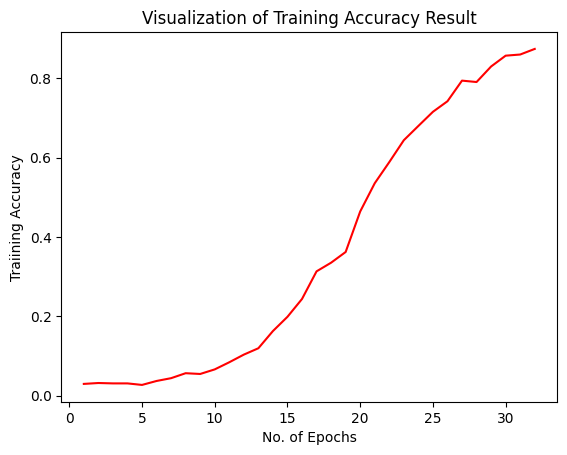

In [ ]:
#Training Visualization
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

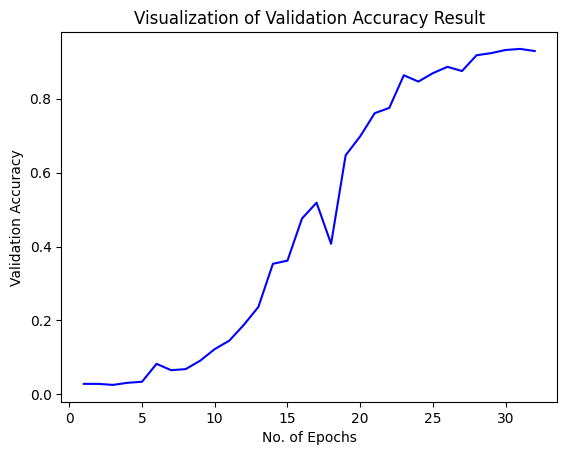

In [ ]:
#Validation Accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/vegetable dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:

test_loss,test_acc = cnn_models.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.9405 - loss: 0.4129
Test accuracy: 0.9303621053695679
